In [1]:
import numpy as np
import pandas as pd
from scipy import optimize
import matplotlib.pyplot as plt
import json,os
%matplotlib inline

In [2]:
df_reviews = pd.read_csv('Yelp_dataset/review_json_to_pd_to_csv.csv')
df_reviews.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,0W4lkclzZThpx3V65bVgig,0,2016-05-28,0.0,v0i_UHJMo_hPBq9bxWvW4w,5.0,"Love the staff, love the meat, love the place....",0.0,bv2nCi5Qv5vroFiqKGopiw
1,AEx2SYEUJmTxVVB18LlCwA,0,2016-05-28,0.0,vkVSCC7xljjrAI4UGfnKEQ,5.0,Super simple place but amazing nonetheless. It...,0.0,bv2nCi5Qv5vroFiqKGopiw
2,VR6GpWIda3SfvPC-lg9H3w,0,2016-05-28,0.0,n6QzIUObkYshz4dz2QRJTw,5.0,Small unassuming place that changes their menu...,0.0,bv2nCi5Qv5vroFiqKGopiw
3,CKC0-MOWMqoeWf6s-szl8g,0,2016-05-28,0.0,MV3CcKScW05u5LVfF6ok0g,5.0,Lester's is located in a beautiful neighborhoo...,0.0,bv2nCi5Qv5vroFiqKGopiw
4,ACFtxLv8pGrrxMm6EgjreA,0,2016-05-28,0.0,IXvOzsEMYtiJI0CARmj77Q,4.0,Love coming here. Yes the place always needs t...,0.0,bv2nCi5Qv5vroFiqKGopiw


In [3]:
df_reviews = df_reviews[['review_id','user_id','business_id','stars','date','text','useful','funny','cool']]

In [4]:
df_business = pd.read_csv('Yelp_dataset/business_json_to_pd_to_csv.csv')
df_business.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
0,"4855 E Warner Rd, Ste B9","{u'AcceptsInsurance': True, u'ByAppointmentOnl...",FYWN1wneV18bWNgQjJ2GNg,"[Dentists, General Dentistry, Health & Medical...",Ahwatukee,"{u'Tuesday': u'7:30-17:00', u'Friday': u'7:30-...",1,33.330690,-111.978599,Dental by Design,NaN,85044,22,4.0,AZ
1,3101 Washington Rd,"{u'BusinessParking': {u'garage': False, u'stre...",He-G7vWjzVUysIKrfNbPUQ,"[Hair Stylists, Hair Salons, Men's Hair Salons...",McMurray,"{u'Monday': u'9:00-20:00', u'Tuesday': u'9:00-...",1,40.291685,-80.104900,Stephen Szabo Salon,NaN,15317,11,3.0,PA
2,"6025 N 27th Ave, Ste 1",{},KQPW8lFf1y5BT2MxiSZ3QA,"[Departments of Motor Vehicles, Public Service...",Phoenix,{},1,33.524903,-112.115310,Western Motor Vehicle,NaN,85017,18,1.5,AZ
3,"5000 Arizona Mills Cr, Ste 435","{u'BusinessAcceptsCreditCards': True, u'Restau...",8DShNS-LuFqpEWIp0HxijA,"[Sporting Goods, Shopping]",Tempe,"{u'Monday': u'10:00-21:00', u'Tuesday': u'10:0...",0,33.383147,-111.964725,Sports Authority,NaN,85282,9,3.0,AZ
4,581 Howe Ave,"{u'Alcohol': u'full_bar', u'HasTV': True, u'No...",PfOCPjBrlQAnz__NXj9h_w,"[American (New), Nightlife, Bars, Sandwiches, ...",Cuyahoga Falls,"{u'Monday': u'11:00-1:00', u'Tuesday': u'11:00...",1,41.119535,-81.475690,Brick House Tavern + Tap,NaN,44221,116,3.5,OH


In [5]:
df_user = pd.read_csv('Yelp_dataset/user_json_to_pd_to_csv.csv')
df_user.head()

,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,...,cool,elite,fans,friends,funny,name,review_count,useful,user_id,yelping_since
0,4.67,0,0,0,0,0,0,0,0,1,...,0,[],0,"[cvVMmlU1ouS3I5fhutaryQ, nj6UZ8tdGo8YJ9lUMTVWN...",0,Johnny,8,0,oMy_rEb0UBEmMlu-zcxnoQ,2014-11-03
1,3.70,0,0,0,0,0,0,0,0,0,...,0,[],0,"[0njfJmB-7n84DlIgUByCNw, rFn3Xe3RqHxRSxWOU19Gp...",0,Chris,10,0,JJ-aSuM4pCFPdkfoZ34q0Q,2013-09-24
2,2.00,0,0,0,0,0,0,0,0,0,...,0,[],0,[],0,Tiffy,1,0,uUzsFQn_6cXDh6rPNGbIFA,2017-03-02
3,4.67,0,0,0,0,0,0,0,0,0,...,0,[],0,[],0,Mark,6,0,mBneaEEH5EMyxaVyqS-72A,2015-03-13
4,4.67,0,0,0,0,0,0,0,0,0,...,0,[],0,[],0,Evelyn,3,0,W5mJGs-dcDWRGEhAzUYtoA,2016-09-08


In [6]:
df_vegas = df_business[df_business.city=='Las Vegas']
df_pitt = df_business[df_business.city=='Pittsburgh']
df_toronto =  df_business[df_business.city=='Toronto']

In [7]:
df_pitt_rest = df_pitt[df_pitt['categories'].str.contains('Restaurant|Food',case = False)]

In [8]:
df_vegas_rest = df_vegas[df_vegas['categories'].str.contains('Restaurant|Food',case = False)]

In [9]:
len(df_vegas_rest.groupby('business_id'))

7608

In [10]:
len(df_pitt_rest.groupby('business_id'))

2876

In [11]:
df_toronto_rest = df_toronto[df_toronto['categories'].str.contains('Restaurant|Food',case = False)]

In [12]:
len(df_toronto_rest.groupby('business_id'))

9152

In [13]:
from textblob import Blobber
from nltk.tokenize.regexp import RegexpTokenizer
from textblob.sentiments import NaiveBayesAnalyzer
from wordcloud import WordCloud
from textblob import TextBlob

In [14]:
txt = "everything tastes bad here"

In [15]:
tb_naive = Blobber(analyzer=NaiveBayesAnalyzer())

In [16]:
blob = TextBlob(txt)
blob.sentiment

Sentiment(polarity=-0.6999999999999998, subjectivity=0.6666666666666666)

In [18]:
blob = tb_naive(txt)
print blob.sentiment.classification
print blob.sentiment.p_pos

neg
0.260801943405


In [19]:
tb_pattern = Blobber()

In [20]:
blob = tb_pattern(txt)
blob.sentiment

Sentiment(polarity=-0.6999999999999998, subjectivity=0.6666666666666666)

In [21]:
def analyze(txt):
  txt =  unicode(txt,'utf-8')
  return pd.Series(tb_pattern(txt).sentiment)

In [22]:
def analyze_naive(txt):
  txt =  unicode(txt,'utf-8')
  return pd.Series(tb_naive(txt).sentiment.p_pos)

In [23]:
df_rev_pitt_rest = pd.read_csv('Yelp_dataset/reviews_pitt_restaurants_sentiment.csv')
df_rev_vegas_rest = pd.read_csv('Yelp_dataset/reviews_vegas_restaurants_sentiment.csv')
df_rev_toronto_rest = pd.read_csv('Yelp_dataset/reviews_toronto_restaurants_sentiment.csv')

In [24]:
#ids = list(df_pitt_rest['business_id'])
#len(ids)

In [25]:
#df_rev_pitt_rest = df_reviews[df_reviews['business_id'].isin(ids)]

In [26]:
#df_rev_pitt_rest.shape

In [27]:
#df_rev_pitt_rest[['polarity', 'subjectivity']] = df_rev_pitt_rest['text'].apply(analyze)

In [28]:
#df_rev_pitt_rest['p_pos'] = df_rev_pitt_rest['text'].apply(analyze_naive)

In [29]:
df_rev_pitt_rest.head()

,Unnamed: 0,review_id,user_id,business_id,stars,date,text,useful,funny,cool,polarity,subjectivity,p_pos
0,742,29GYq-cnZ2sq62uECsii1Q,5V8eXkTJb6IejJkMDaj_Bw,jDqaz1jKdeWk_fTVCzc1Pg,5.0,2011-05-18,The ever changing menu at Conflict Kitchen is ...,0.0,0.0,0,0.217937,0.532381,0.999998
1,840,qIuYU3gP_pLXB5nvZ2hZnQ,5V8eXkTJb6IejJkMDaj_Bw,wcA-pfNAmxRJC9N2IcJX3w,5.0,2009-08-24,Passionfruit + coconut + cupcake = decadent mo...,2.0,1.0,1,0.657143,0.714286,0.999402
2,938,ABLAa2GvPmT3fC_RCLjFxA,5V8eXkTJb6IejJkMDaj_Bw,EZ9Uf-lSRtj1fvdMQlrwAw,3.0,2011-05-18,How can I not review the place that bears the ...,0.0,0.0,0,0.057333,0.469167,0.273405
3,1149,zUewr1eQLUpzbSzi5qnkZA,fExL6u06xTSg13k945IPAQ,lpxj6LFir23Ds6swW8a6fg,3.0,2017-11-26,The view is second to none. That being said th...,2.0,0.0,0,0.085069,0.459028,0.004160
4,1152,uUzLhs1EhfOcBUvXOYslZg,fExL6u06xTSg13k945IPAQ,dRbmeC5hl211hH-WeMtv-g,5.0,2017-11-24,Solid 4 star place. \n\nSomeone in my party me...,2.0,0.0,1,0.130060,0.448214,0.998491


In [30]:
#ids = list(df_vegas_rest['business_id'])
#len(ids)

In [31]:
#df_rev_vegas_rest = df_reviews[df_reviews['business_id'].isin(ids)]

In [32]:
#df_rev_vegas_rest.shape

In [33]:
#df_rev_vegas_rest[['polarity', 'subjectivity']] = df_rev_vegas_rest['text'].apply(analyze)

In [34]:
#df_rev_vegas_rest['p_pos'] = df_rev_vegas_rest['text'].apply(analyze_naive)

In [35]:
#ids = list(df_toronto_rest['business_id'])
#len(ids)

In [36]:
#df_rev_toronto_rest = df_reviews[df_reviews['business_id'].isin(ids)]

In [37]:
#df_rev_toronto_rest.shape

In [38]:
#df_rev_toronto_rest[['polarity', 'subjectivity']] = df_rev_toronto_rest['text'].apply(analyze)

In [39]:
#df_rev_toronto_rest['p_pos'] = df_rev_toronto_rest['text'].apply(analyze_naive)

In [40]:
#df_rev_vegas_rest.to_csv('Yelp_dataset/reviews_vegas_restaurants_sentiment.csv')

In [41]:
#df_rev_pitt_rest.to_csv('Yelp_dataset/reviews_pitt_restaurants_sentiment.csv')

In [42]:
#df_rev_toronto_rest.to_csv('Yelp_dataset/reviews_toronto_restaurants_sentiment.csv')

### Distribution of polarity metric from sentiment analysis (Pattern Analyzer)

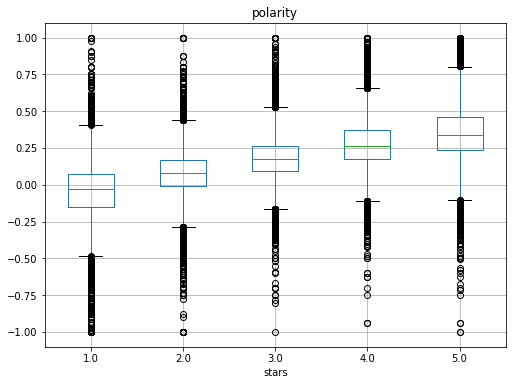

In [43]:
df_rev_pitt_rest.boxplot(column='polarity',by='stars',figsize=(8.0, 6.0))
plt.suptitle('')
plt.show()

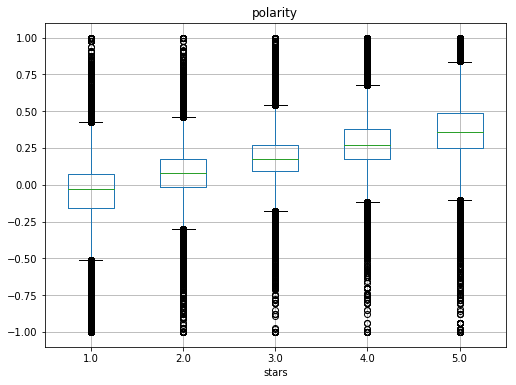

In [44]:
df_rev_vegas_rest.boxplot(column='polarity',by='stars',figsize=(8.0, 6.0))
plt.suptitle('')
plt.show()

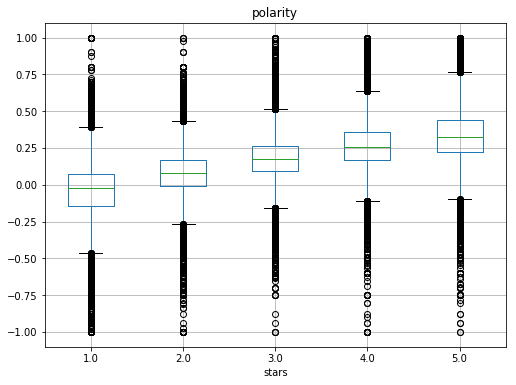

In [45]:
df_rev_toronto_rest.boxplot(column='polarity',by='stars',figsize=(8.0, 6.0))
plt.suptitle('')
plt.show()

### Distribution of probability score that a review is positive from sentiment analysis (Naive Bayes Analyzer)

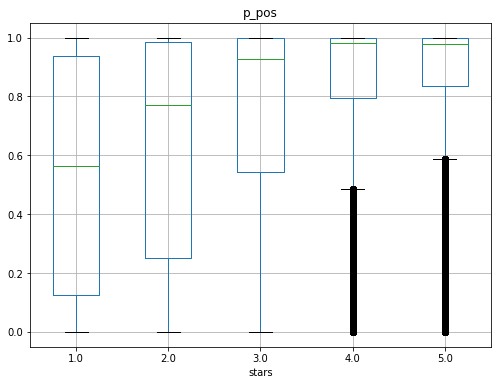

In [46]:
df_rev_pitt_rest.boxplot(column='p_pos',by='stars',figsize=(8.0, 6.0))
plt.suptitle('')
plt.show()

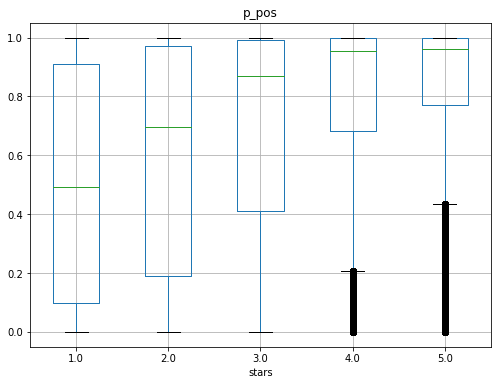

In [47]:
df_rev_vegas_rest.boxplot(column='p_pos',by='stars',figsize=(8.0, 6.0))
plt.suptitle('')
plt.show()

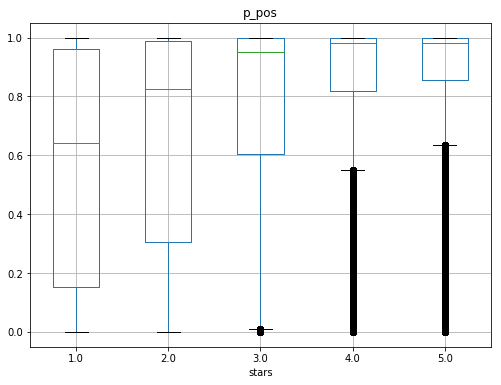

In [48]:
df_rev_toronto_rest.boxplot(column='p_pos',by='stars',figsize=(8.0, 6.0))
plt.suptitle('')
plt.show()

### Distribution of polarity metric for  restaurants with high final rating (>= 4 stars)

In [49]:
df_pitt_rest_high = df_pitt_rest[(df_pitt_rest['stars']>=4) & (df_pitt_rest['review_count'] > 100)]

In [50]:
ids = list(df_pitt_rest_high['business_id'])
len(ids)

215

In [51]:
df_rev_pitt_rest_high = df_rev_pitt_rest[df_rev_pitt_rest['business_id'].isin(ids)]

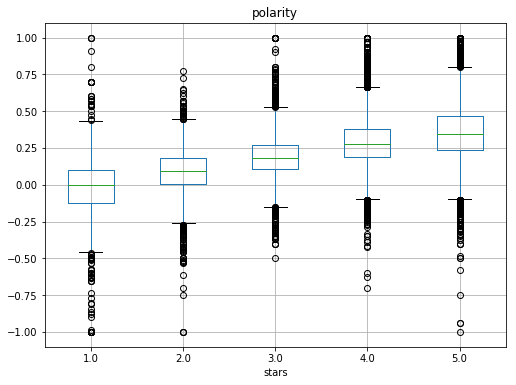

In [52]:
df_rev_pitt_rest_high.boxplot(column='polarity',by='stars',figsize=(8.0, 6.0))
plt.suptitle('')
plt.show()

In [53]:
df_vegas_rest_high = df_vegas_rest[(df_vegas_rest['stars']>=4) & (df_vegas_rest['review_count'] > 100)]

In [54]:
ids = list(df_vegas_rest_high['business_id'])
len(ids)

1167

In [55]:
df_rev_vegas_rest_high = df_rev_vegas_rest[df_rev_vegas_rest['business_id'].isin(ids)]

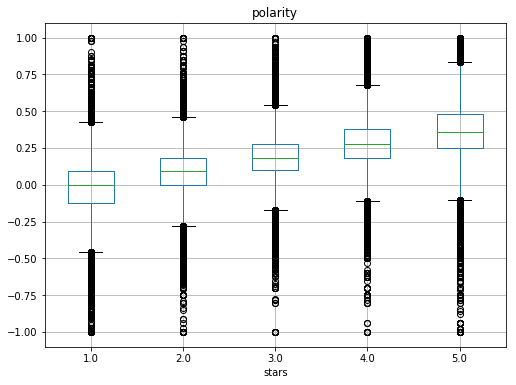

In [56]:
df_rev_vegas_rest_high.boxplot(column='polarity',by='stars',figsize=(8.0, 6.0))
plt.suptitle('')
plt.show()

In [57]:
df_toronto_rest_high = df_toronto_rest[(df_toronto_rest['stars']>=4) & (df_toronto_rest['review_count'] > 100)]

In [58]:
ids = list(df_toronto_rest_high['business_id'])
len(ids)

372

In [59]:
df_rev_toronto_rest_high = df_rev_toronto_rest[df_rev_toronto_rest['business_id'].isin(ids)]

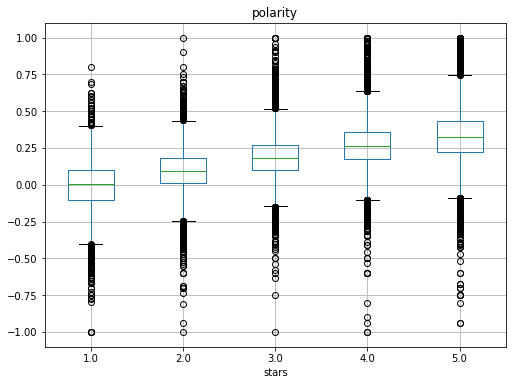

In [60]:
df_rev_toronto_rest_high.boxplot(column='polarity',by='stars',figsize=(8.0, 6.0))
plt.suptitle('')
plt.show()

### Distribution of polarity metric for  restaurants with mediocre final rating (3-3.5 stars)

In [61]:
df_pitt_rest_mid = df_pitt_rest[(df_pitt_rest['stars']<4) & (df_pitt_rest['stars']>=3) & (df_pitt_rest['review_count'] > 100)]

In [62]:
ids = list(df_pitt_rest_mid['business_id'])
len(ids)

151

In [63]:
df_rev_pitt_rest_mid = df_rev_pitt_rest[df_rev_pitt_rest['business_id'].isin(ids)]

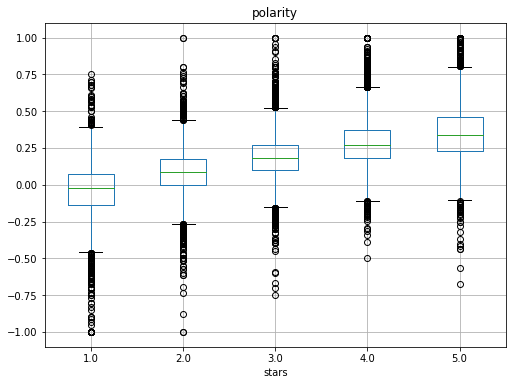

In [64]:
df_rev_pitt_rest_mid.boxplot(column='polarity',by='stars',figsize=(8.0, 6.0))
plt.suptitle('')
plt.show()

In [65]:
df_vegas_rest_mid = df_vegas_rest[(df_vegas_rest['stars']<4) & (df_vegas_rest['stars']>=3) & (df_vegas_rest['review_count'] > 100)]

In [66]:
ids = list(df_vegas_rest_mid['business_id'])
len(ids)

824

In [67]:
df_rev_vegas_rest_mid = df_rev_vegas_rest[df_rev_vegas_rest['business_id'].isin(ids)]

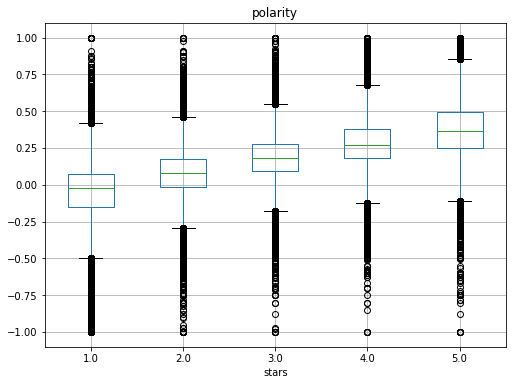

In [68]:
df_rev_vegas_rest_mid.boxplot(column='polarity',by='stars',figsize=(8.0, 6.0))
plt.suptitle('')
plt.show()

In [69]:
df_toronto_rest_mid = df_toronto_rest[(df_toronto_rest['stars']<4) & (df_toronto_rest['stars']>=3) & (df_toronto_rest['review_count'] > 100)]

In [70]:
ids = list(df_toronto_rest_mid['business_id'])
len(ids)

408

In [71]:
df_rev_toronto_rest_mid = df_rev_toronto_rest[df_rev_toronto_rest['business_id'].isin(ids)]

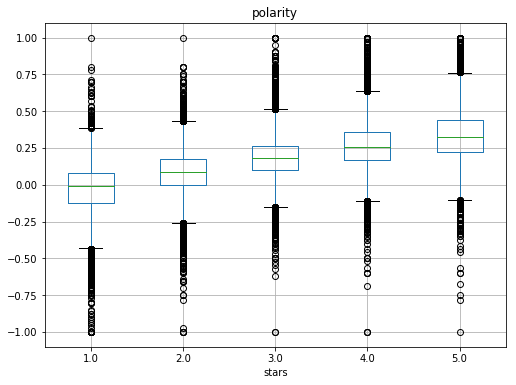

In [72]:
df_rev_toronto_rest_mid.boxplot(column='polarity',by='stars',figsize=(8.0, 6.0))
plt.suptitle('')
plt.show()

### Distribution of polarity metric for  restaurants with low final rating (< 3 stars)

In [73]:
df_pitt_rest_low = df_pitt_rest[(df_pitt_rest['stars']<3) & (df_pitt_rest['review_count'] > 100)]

In [74]:
ids = list(df_pitt_rest_low['business_id'])
len(ids)

8

In [75]:
df_rev_pitt_rest_low = df_rev_pitt_rest[df_rev_pitt_rest['business_id'].isin(ids)]

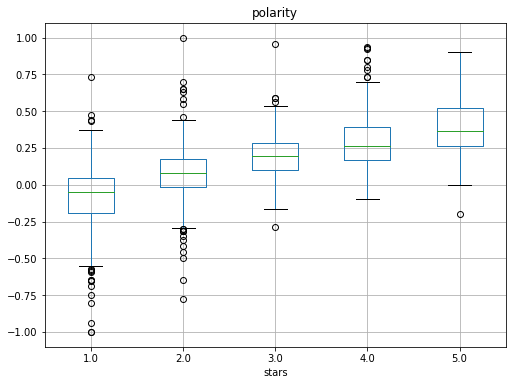

In [76]:
df_rev_pitt_rest_low.boxplot(column='polarity',by='stars',figsize=(8.0, 6.0))
plt.suptitle('')
plt.show()

In [77]:
df_vegas_rest_low = df_vegas_rest[(df_vegas_rest['stars']<3) & (df_vegas_rest['review_count'] > 100)]

In [78]:
ids = list(df_vegas_rest_low['business_id'])
len(ids)

135

In [79]:
df_rev_vegas_rest_low = df_rev_vegas_rest[df_rev_vegas_rest['business_id'].isin(ids)]

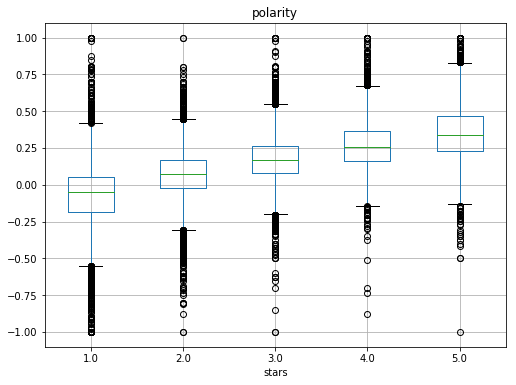

In [80]:
df_rev_vegas_rest_low.boxplot(column='polarity',by='stars',figsize=(8.0, 6.0))
plt.suptitle('')
plt.show()

In [81]:
df_toronto_rest_low = df_toronto_rest[(df_toronto_rest['stars']<3) & (df_toronto_rest['review_count'] > 100)]

In [82]:
ids = list(df_toronto_rest_low['business_id'])
len(ids)

23

In [83]:
df_rev_toronto_rest_low = df_rev_toronto_rest[df_rev_toronto_rest['business_id'].isin(ids)]

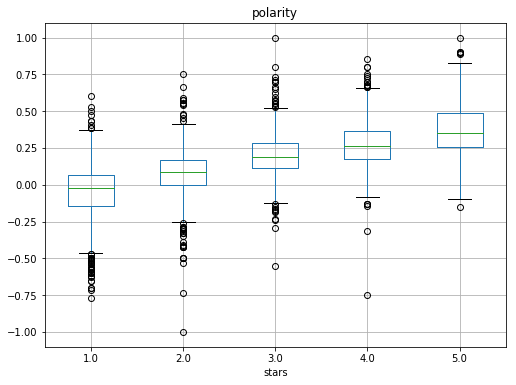

In [84]:
df_rev_toronto_rest_low.boxplot(column='polarity',by='stars',figsize=(8.0, 6.0))
plt.suptitle('')
plt.show()

### Distribution of probability score for  restaurants with high final rating (>= 4 stars)

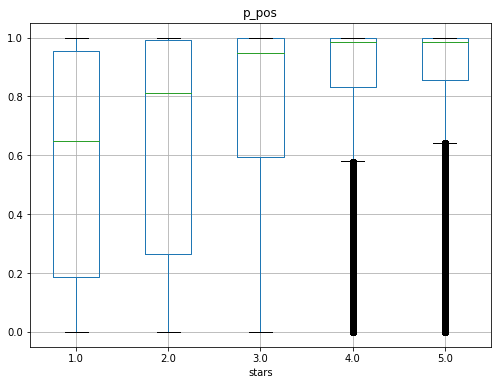

In [85]:
df_rev_pitt_rest_high.boxplot(column='p_pos',by='stars',figsize=(8.0, 6.0))
plt.suptitle('')
plt.show()

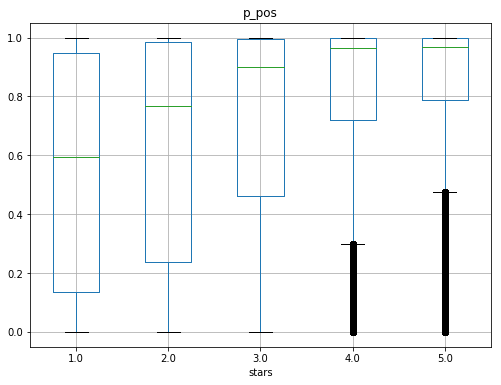

In [86]:
df_rev_vegas_rest_high.boxplot(column='p_pos',by='stars',figsize=(8.0, 6.0))
plt.suptitle('')
plt.show()

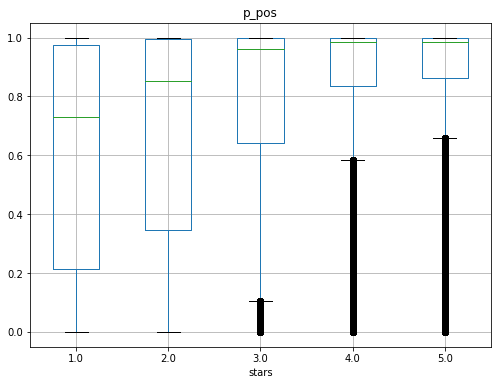

In [87]:
df_rev_toronto_rest_high.boxplot(column='p_pos',by='stars',figsize=(8.0, 6.0))
plt.suptitle('')
plt.show()

### Distribution of probability score for  restaurants with mediocre final rating (3-3.5 stars)

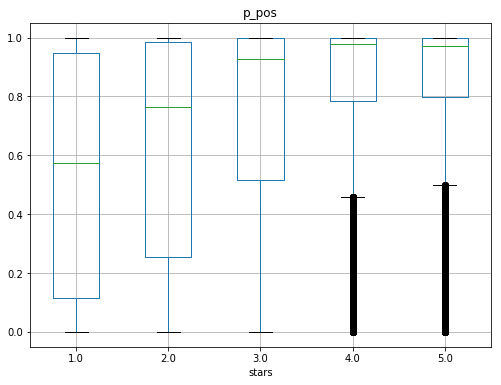

In [88]:
df_rev_pitt_rest_mid.boxplot(column='p_pos',by='stars',figsize=(8.0, 6.0))
plt.suptitle('')
plt.show()

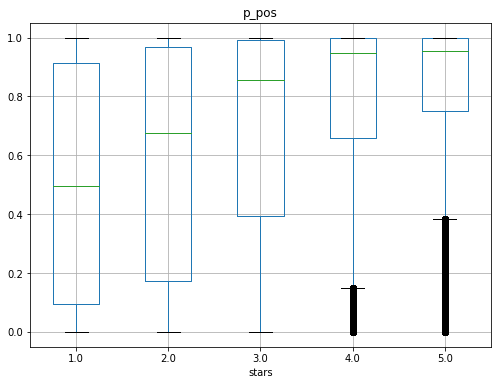

In [89]:
df_rev_vegas_rest_mid.boxplot(column='p_pos',by='stars',figsize=(8.0, 6.0))
plt.suptitle('')
plt.show()

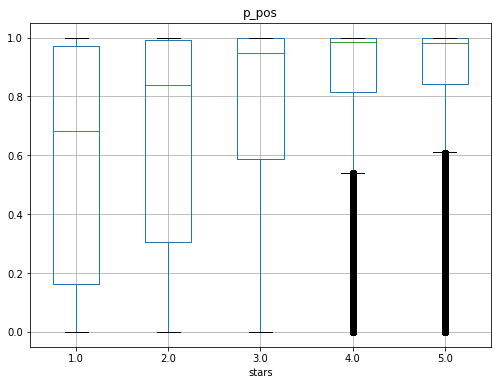

In [90]:
df_rev_toronto_rest_mid.boxplot(column='p_pos',by='stars',figsize=(8.0, 6.0))
plt.suptitle('')
plt.show()

### Distribution of probability score for  restaurants with low final rating (< 3 stars)

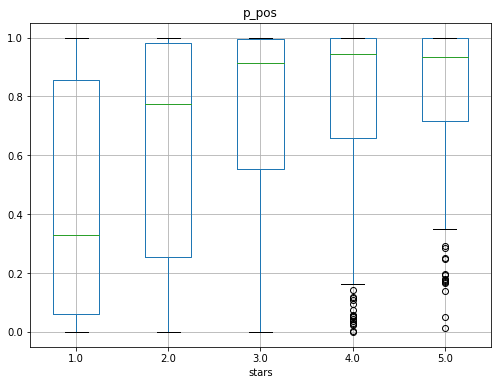

In [91]:
df_rev_pitt_rest_low.boxplot(column='p_pos',by='stars',figsize=(8.0, 6.0))
plt.suptitle('')
plt.show()

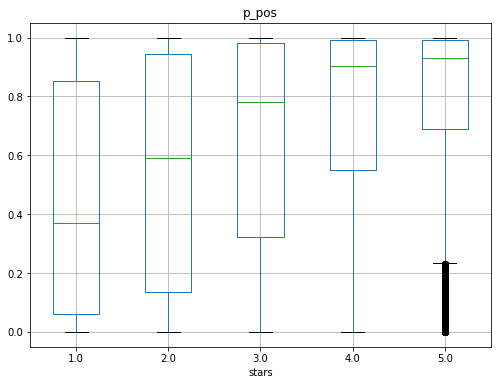

In [92]:
df_rev_vegas_rest_low.boxplot(column='p_pos',by='stars',figsize=(8.0, 6.0))
plt.suptitle('')
plt.show()

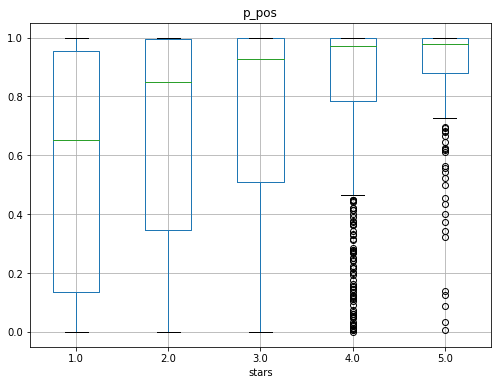

In [93]:
df_rev_toronto_rest_low.boxplot(column='p_pos',by='stars',figsize=(8.0, 6.0))
plt.suptitle('')
plt.show()